# Name: Pradnya Salve

# Task-1

# Fake News Detection Project

**Importing required liabraries**

In [20]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

**Loding the dataset**

In [4]:
fake_data=pd.read_csv("C:\\Users\\icon\\Desktop\\ML_TE\\dataset\\news.csv")

In [5]:
fake_data

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


**First five rows**

In [6]:
fake_data.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


**Last five rows**

In [7]:
fake_data.tail()

,Unnamed: 0,title,text,label
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL
6334,4330,Jeb Bush Is Suddenly Attacking Trump. Here's W...,Jeb Bush Is Suddenly Attacking Trump. Here's W...,REAL


In [9]:
fake_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


**Check for null values**

In [11]:
fake_data.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

**Splitting target and features variable**

In [13]:
X=fake_data.drop('label',axis=1) # Features
y=fake_data['label']             # Target

**Get labels from the dataset**

In [14]:
labels=fake_data.label
labels.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

**Count of target variable**

In [16]:
target=fake_data.label.value_counts()
target

REAL    3171
FAKE    3164
Name: label, dtype: int64

**Countplot for number of fake and real news**

C:\Users\icon\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


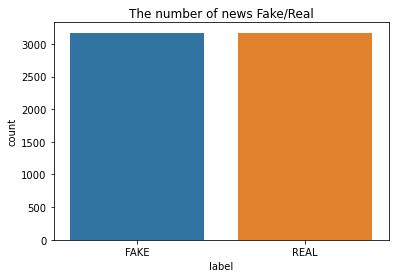

In [18]:
sns.countplot(fake_data.label)
plt.title('The number of news Fake/Real')

**Split the dataset into training and testing data**

In [21]:
x_train,x_test,y_train,y_test=train_test_split(fake_data['text'], labels, test_size=0.2, random_state=7)

**Initialize a TfidfVectorizer**

In [23]:
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_test=tfidf_vectorizer.transform(x_test)

**Initialize a PassiveAggressiveClassifier**

In [24]:
PAC=PassiveAggressiveClassifier(max_iter=50)
PAC.fit(tfidf_train,y_train)

PassiveAggressiveClassifier(max_iter=50)

In [28]:
y_pred=PAC.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy Score: {round(score*100,2)}%')

Accuracy Score: 92.34%


**Building confusion matrix** 

In [29]:
confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])

array([[584,  54],
       [ 43, 586]], dtype=int64)

# THANK YOU!!